In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

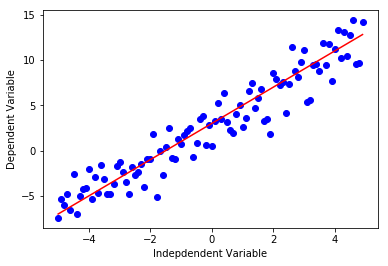

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

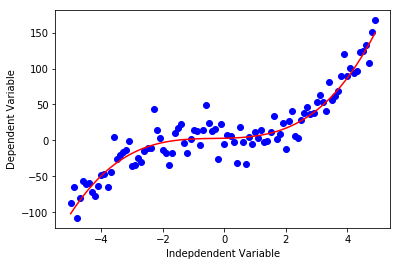

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [4]:
import numpy as np
import pandas as pd

#downloading dataset
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("E:\Digitalent\china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


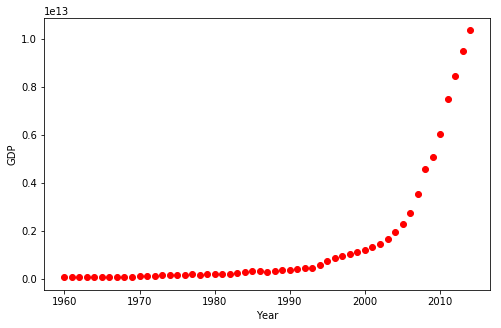

In [5]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [6]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

def cubic_polynomial(x, Beta_0, Beta_1, Beta_2, Beta_3, Beta_4):
     y = Beta_0 + Beta_1*x + Beta_2*(x**2) + Beta_3*(x**3)
     return y

def eksponensial(x, Beta_0, Beta_1):
    y = Beta_0*np.exp(Beta_1*x)
    return y

In [7]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [10]:
from scipy.optimize import curve_fit
popt1, pcov1 = curve_fit(sigmoid, xdata, ydata, maxfev=10000)
popt2, pcov2 = curve_fit(eksponensial, xdata, ydata, maxfev=10000)
#print the final parameters
#print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

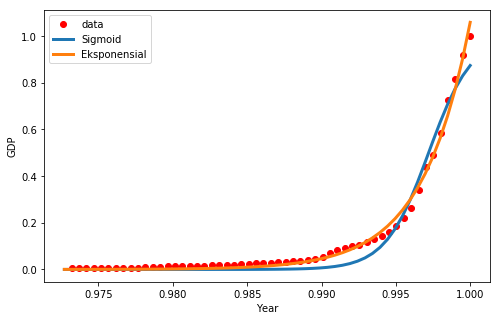

In [11]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y1 = sigmoid(x, *popt1)
y2 = eksponensial(x, *popt2)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y1, linewidth=3.0, label='Sigmoid')
plt.plot(x,y2, linewidth=3.0, label='Eksponensial')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using t rain set
popt1, pcov = curve_fit(sigmoid, train_x, train_y,maxfev=10000)
popt2, pcov = curve_fit(eksponensial, train_x, train_y,maxfev=10000)

# predict using test set
y_hat1 = sigmoid(test_x, *popt1)
y_hat2 = eksponensial(test_x, *popt2)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat1 , test_y) )
                                                       
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))                                                                              
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat2 , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97
Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 1.00
